# Numerical Modelling
The main objective of our model is to predict the break-up of the ice, however, we don't have a lot of ice-related observations. Typically we have less that 10 measurement from the beginning of the year until break up, but we have extensive temperature data. Taking this thing into consideration we  are re-visiting Stefan's formula introduced in the first week of MUDE.

Lets consider Ashton's formula an improved version of Stefan's formula [[1]](https://static1.1.sqspcdn.com/static/f/572109/18056158/1336339358653/thin+ice+growth.pdf?token=9mlCTJ8q6DFV3imaaSj54iHJW%2FQ%3D)

$$\frac{dH}{dt}=\left(\frac{1}{\rho L}\right)\frac{T_m-T}{\frac{h}{k}+\frac{1}{H_{ia}}}$$


(all value from Wolfram Alpha knowledge database)
- Ice density - $\rho=997.048 [kg/m^3] $
- Ice heat of fusion(specific) -  $L=334000 [J/kg]$
- Ice fusion temperature - $T_m=0[°C]$
- Ice thermal conductivity - $k=0.598 [W/(m °C)]$
- Heat transfer coeficient -$H_{ia}=20 [W/(m^2 °C)]$

then, the ice thickness over time can be expressed as function of 

$$H=f(T,t)$$

:::{card} Ex 1. 
Solve the ODE using  Sympy
:::

In [1]:
import sympy as sp

# Define the symbols
t = sp.symbols('t')
H = sp.Function('H')(t)
H_0=0
rho, L, T_m, T, h, k, H_ia = sp.symbols('rho L T_m T h k H_ia')

# Define the ODE
ode = sp.Eq(H.diff(t), (1/(rho * L)) * (T_m - T) / (H/k + 1/H_ia))

ics = {H.subs(t, 0): H_0}

solution_with_ics = sp.dsolve(ode, H, ics=ics)

# Display the particular solution
solution_with_ics


Eq(H(t), (-k + sqrt(L*rho*(-2*H_ia**2*T*k*t + 2*H_ia**2*T_m*k*t + L*k**2*rho))/(L*rho))/H_ia)

The previous expression presupposed that $T$ is not a function of time, but as we saw in the previous sections, temperature does changes over time. Lets take a look back to the distribution of temperature over time


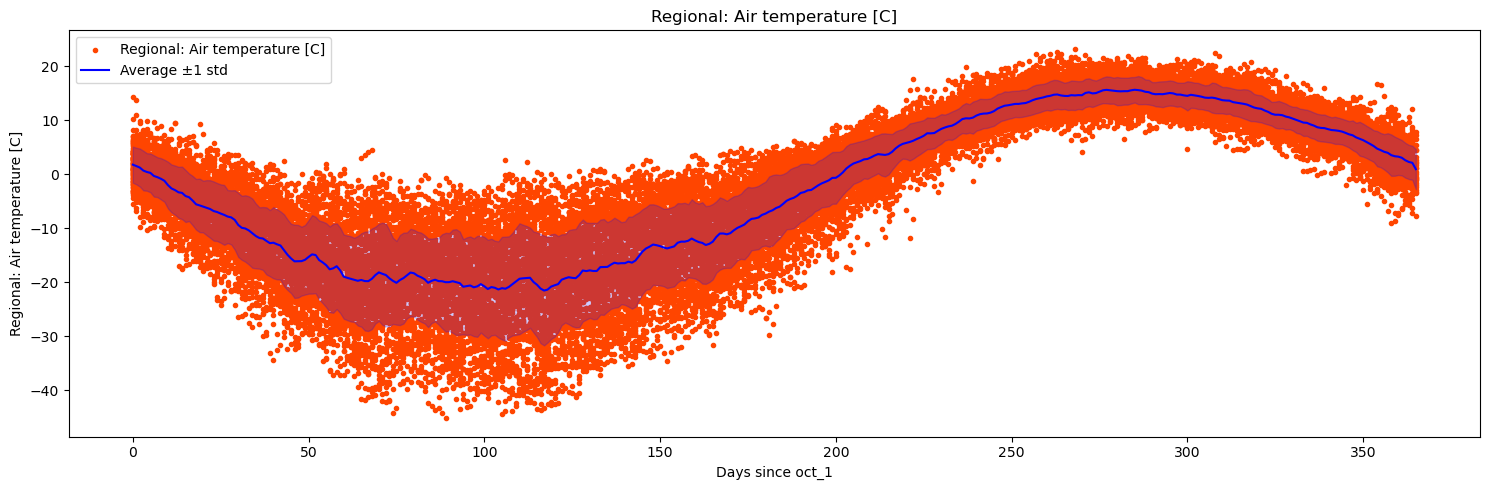

In [4]:
from funciones import*
import pandas as pd
import matplotlib.pyplot as plt
Data=pd.read_csv("../../data/Time_series_DATA.txt",skiprows=149,index_col=0)
Data=Data.drop(columns=['Predicted ice thickness [m]','Noisy predicted ice thickness [m]','Global: Pacific decadal oscillation index','Global: Artic oscillation index'])
#Data=pd.read_csv('https://raw.githubusercontent.com/iceclassic/sandbox/main/Data/Time_series_DATA.txt',index_col=0,skiprows=149)
Data.index = Data.index.astype(str).str.split().str[0]
Data.index = pd.to_datetime(Data.index, format="%Y-%m-%d")



Data=days_since_last_date(Data,date_or_dates='10/1',name='oct_1')
seasonal_trends(Data,k=1,plot_mean_std=True,columns_to_plot=['Regional: Air temperature [C]'],xaxis='oct_1')

October 1st seem, like a good date to consider t=0, as we can reasonably assume that the ice thickness is zero because the temperature has just started to get below zero.
In the other hand, from the plot of historic break-up dates we can reasonably  assume that the latest day that we might consider  is around may 15.

::: {card} Ex 2.
How many days is may 15 away from oct 1?
Use Pandas built-in method to compute it
::

In [6]:
T0 = '2023-10-01'
Tf = '2024-05-15'
number_of_days = (pd.to_datetime(Tf) - pd.to_datetime(T0)).days

print(f'The number of days between {T0} and {Tf} is {number_of_days} days.')

The number of days between 2023-10-01 and 2024-05-15 is 227 days.


Which looking at the plot correspond to the point when the temperature is in average over zero, which is what we assume, great.

:::{card} Ex 3. Create a dataframe with the data for this timeframe

```{admonition} Tips/Help
:class: tip, dropdown
``
- If you use `filter_df` you might not get what you want. Why is that?
- Use simple indexing slicing to get the data in one line. Remember that we added a column to our df called `days since 10/1` and we care about data that is no more that 227 days from this date

```


:::

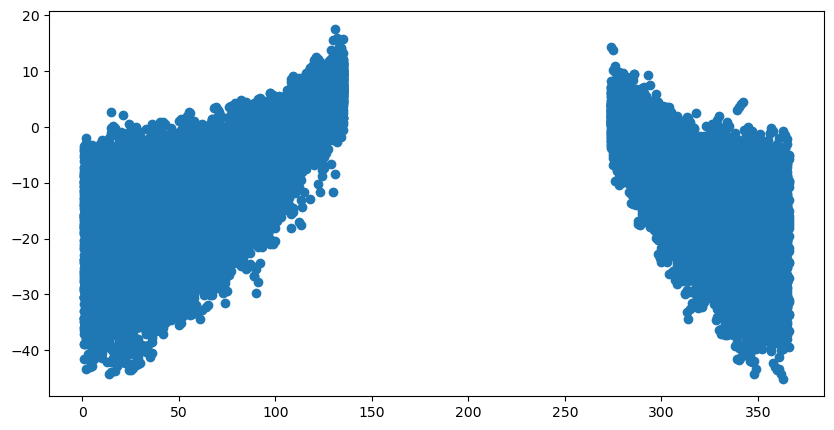

In [13]:
filtered_1 = Data[Data['oct_1'] < 227]

# lest double check wiht a very quick plot
plt.figure(figsize=(10,5))
plt.scatter(filtered_1['Days since start of year'],filtered_1['Regional: Air temperature [C]'])
plt.title("Historic Temperatures"

(0.0, 360.0)

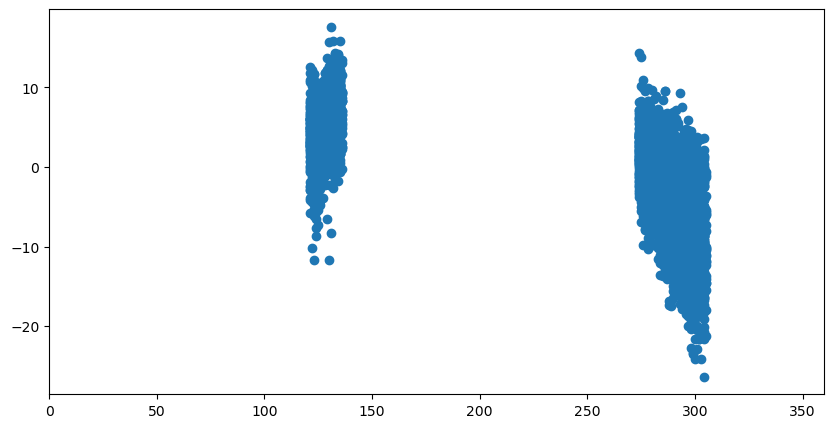

In [16]:
filtered_2=filter_df(Data,start_date='10/01',end_date='05/15')
# lest double check wiht a very quick plot
plt.figure(figsize=(10,5))
plt.scatter(filtered_2['Days since start of year'],filtered_2['Regional: Air temperature [C]'])
plt.xlim(0, 360)

Lets make a proper plot, using the function that we have already seen before

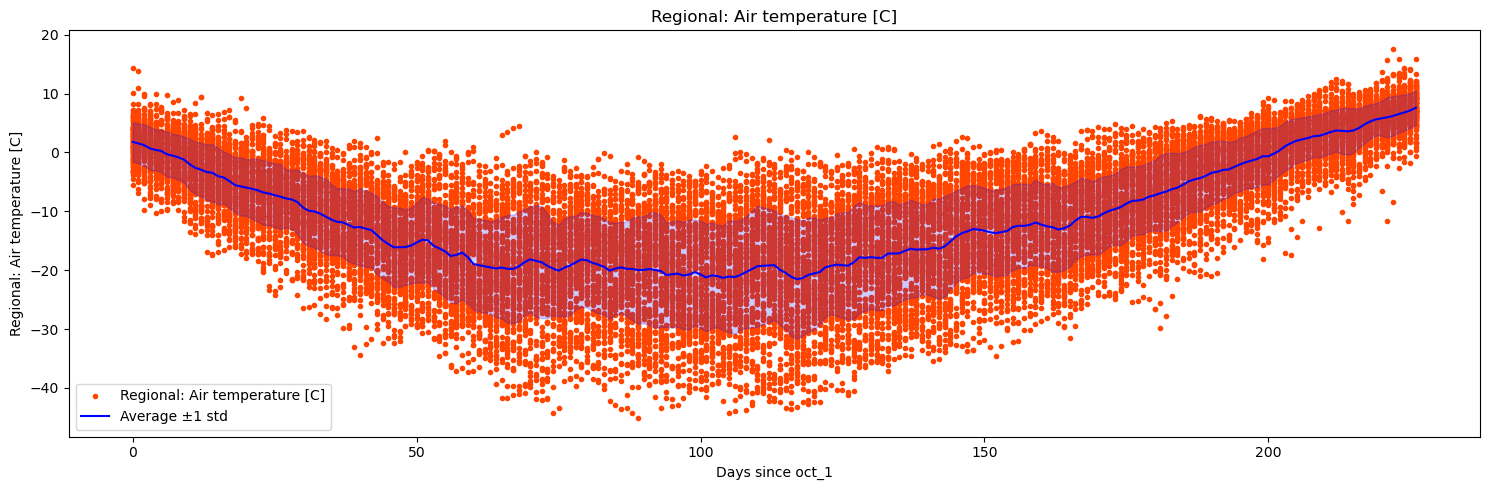

In [20]:
seasonal_trends(filtered_1,columns_to_plot=['Regional: Air temperature [C]'],k=1,plot_mean_std=True,xaxis='oct_1')

### (BLUE) Fit model to temperature in this range
- polinomic
- others?

#### Add harmonic component to include daily temp fluctuation
compare to case in which we ignore this 


### Compute Ice thickness 
- re-solve Ode but now considering that T(t)
- compare historic ice thickness vs mesured ice thickness ( wont be very good)


 In average we can find *good* fit fot $T(t)$ , but how does the fit perform in individual years ( use the coefficient from the global fit and compute residual for each year, plot them) On the there side of the coin, use the same function to compute the fit for each year, compare the coefficients and the residuals.

 



## Finite Differences
 BE vs FE 
the coding is mostly done, its is part 2 but ill move here
